In [35]:
# Install required libraries
!pip install -q matplotlib numpy pillow plotly

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from PIL import Image
import requests
from io import BytesIO

# STEP 1: Load an example image (this one is a toy car)
url = "https://images.unsplash.com/photo-1592194996308-7b43878e84a6"  # you can change this later
response = requests.get(url)
img = Image.open(BytesIO(response.content)).convert("RGB")
img = img.resize((64, 64))  # resize for processing

# STEP 2: Generate a fake 3D point cloud from image pixels (for visualization)
pixels = np.array(img)
points = []
for i in range(pixels.shape[0]):
    for j in range(pixels.shape[1]):
        r, g, b = pixels[i, j]
        if r+g+b > 100:  # filter out dark background
            x, y, z = i, j, (r + g + b) / 3
            points.append((x, y, z, r, g, b))

points = np.array(points)

# STEP 3: Visualize the point cloud
fig = go.Figure(data=[go.Scatter3d(
    x=points[:, 0],
    y=points[:, 1],
    z=points[:, 2],
    mode='markers',
    marker=dict(
        size=2,
        color=['rgb({},{},{})'.format(r,g,b) for r,g,b in points[:,3:].astype(int)],
    )
)])
fig.update_layout(title="3D Point Cloud from Image", scene=dict(
    xaxis_title='X',
    yaxis_title='Y',
    zaxis_title='Z'))
fig.show()


<ipython-input-35-9e24bb60bd99>:24: RuntimeWarning: overflow encountered in scalar add
  if r+g+b > 100:  # filter out dark background
<ipython-input-35-9e24bb60bd99>:25: RuntimeWarning: overflow encountered in scalar add
  x, y, z = i, j, (r + g + b) / 3


In [37]:
from google.colab import files
uploaded = files.upload()




Saving plastic-toy-car-on-white-260nw-1560717611.webp to plastic-toy-car-on-white-260nw-1560717611.webp


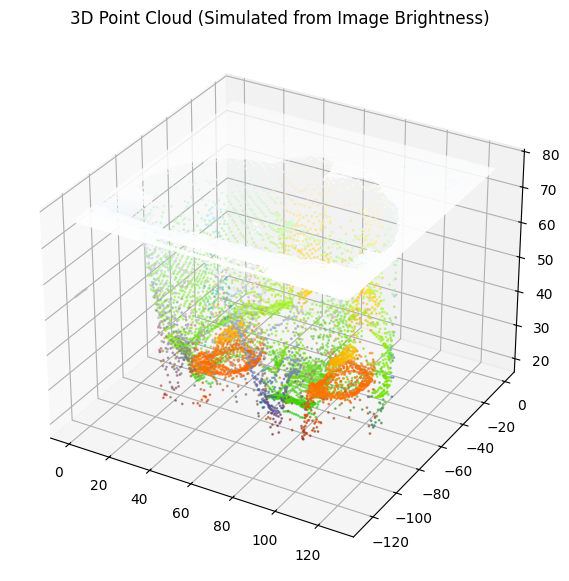

In [38]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the image
img_path = "/content/plastic-toy-car-on-white-260nw-1560717611.webp"
img = Image.open(img_path).convert("RGB")
img = img.resize((128, 128))  # Resize for speed

# Convert to numpy array
img_array = np.array(img)

# Generate fake depth based on brightness
points = []
for i in range(img_array.shape[0]):
    for j in range(img_array.shape[1]):
        r, g, b = img_array[i, j]
        brightness = int(r) + int(g) + int(b)
        if brightness > 200:  # filter dark pixels (background)
            x, y = j, -i
            z = brightness / 10  # fake depth
            points.append((x, y, z, r / 255, g / 255, b / 255))

# Convert to numpy
points = np.array(points)

# Plot the 3D point cloud
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=points[:, 3:6], s=1)
ax.set_title("3D Point Cloud (Simulated from Image Brightness)")
plt.show()


Saving plastic-toy-car-on-white-260nw-1560717611.webp to plastic-toy-car-on-white-260nw-1560717611 (1).webp


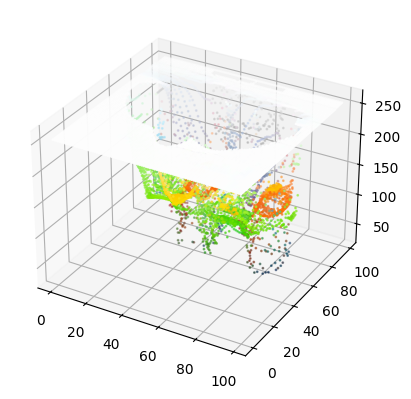

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
# Step 1: Install dependencies
!pip install trimesh matplotlib pillow

# Step 2: Import necessary libraries
import numpy as np
from PIL import Image
import trimesh
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 3: Upload image manually via Colab file picker
from google.colab import files
uploaded = files.upload()

# Step 4: Load uploaded image
img_path = list(uploaded.keys())[0]
img = Image.open(img_path).convert("RGB")
img = img.resize((100, 100))  # Resize for speed

# Step 5: Generate 3D point cloud
points = []
colors = []
for i in range(img.width):
    for j in range(img.height):
        r, g, b = img.getpixel((i, j))
        if r + g + b > 100:  # Skip dark background
            x, y = i, j
            z = (r + g + b) / 3
            points.append([x, y, z])
            colors.append([r/255, g/255, b/255])

points = np.array(points)

# Step 6: Visualize 3D point cloud
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=colors, s=1)
plt.show()

# Step 7: Create mesh from point cloud (fake faces)
mesh = trimesh.points.PointCloud(points)
mesh.export("model.obj")
mesh.export("model.stl")

# Step 8: Offer download
files.download("model.obj")
files.download("model.stl")
